# Online Payment Fraud Detection
##### Problem Statement:
Online payment fraud detection is a common problem that banking sector and businesses facing when processing payments online. The goal is to detect fraudulent transactions or not a fraudulent transactions.
 

 #### Transaction Monitoring: 
 This involves using machine learning algorithms to analyze transactions in real-time, looking for patterns or anomalies that may indicate fraud. For example, a sudden increase in the number of transactions or a change in transaction patterns may indicate fraudulent activity.     

 Hence, inorder to identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments.

### About Dataset:
There are 1048575 rows and 11 columns in our dataset.

###### step : Represents a unit of time where 1 step equals 1 hour   
###### type : Type of online transaction and In this type column there have Five type of transactions are:
                CASH-IN: This type of transaction indicates that cash has been deposited into the account. It increases the balance of the account holder.
                CASH-OUT: This type of transaction represents a cash withdrawal from the account. It decreases the balance of the account holder.
                DEBIT: A "DEBIT" transaction signifies a payment made from the account holder's account to another account. In this case, the transaction also involves reducing the balance of the account holder (sender). However, the key difference is that the recipient of the funds is an internal account within the same financial institution. It is essentially a transfer of funds between accounts owned by the same customer or financial entity.
                PAYMENT: A "PAYMENT" transaction represents a payment made by the account holder to another account. In this type of transaction, the account holder (sender) is transferring money from their account to a different account, which could be either another customer's account or a business account. The transaction decreases the balance of the account holder (sender) as they are paying someone else.
                TRANSFER: A transfer transaction involves moving funds from one account to another. It may be between accounts of the same customer or different customers.
###### amount : The amount of the transaction 
###### nameOrig : Customer starting the transaction  
###### oldbalanceOrg : Balance before the transaction  
###### newbalanceOrig : Balance after the transaction  
###### nameDest : Recipient of the transaction  
###### oldbalanceDest : Initial balance of recipient before the transaction     
###### newbalanceDest : The new balance of recipient after the transaction    
###### isFraud : Fraud transaction    
###### isFlaggedFraud : Flagged (assumption) fraud transaction

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

### Loading Dataset

In [2]:
df=pd.read_csv("Online Payment Fraud Detection.csv")

##### Processing and Manipulating the Data

In [3]:
df.shape

(1048575, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,NaN,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048529e+06,1.048536e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586671e+05,8.740104e+05,8.938097e+05,9.781449e+05,1.114113e+06,1.089097e-03,0.0
std,1.562325e+01,2.649410e+05,2.971752e+06,3.008273e+06,2.296742e+06,2.416292e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214911e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634363e+04,1.600200e+04,0.000000e+00,1.263605e+05,2.182503e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366425e+05,1.746007e+05,9.159430e+05,1.149778e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


##### Finding Null values in the dataset

In [7]:
df.isnull().sum()

step               0
type               0
amount             1
nameOrig           0
oldbalanceOrg      1
newbalanceOrig     1
nameDest           0
oldbalanceDest    46
newbalanceDest    39
isFraud            0
isFlaggedFraud     0
dtype: int64

###### Replacing Null value with Median

In [8]:
median1=df["newbalanceDest"].median()
df["newbalanceDest"]=df["newbalanceDest"].replace(np.NaN,median1)

In [9]:
median2=df["oldbalanceDest"].median()
df["oldbalanceDest"]=df["oldbalanceDest"].replace(np.NaN,median2)

In [10]:
median3=df["amount"].median()
df["amount"]=df["amount"].replace(np.NaN,median3)

In [11]:
median4=df["oldbalanceOrg"].median()
df["oldbalanceOrg"]=df["oldbalanceOrg"].replace(np.NaN,median4)

In [12]:
median5=df["newbalanceOrig"].median()
df["newbalanceOrig"]=df["newbalanceOrig"].replace(np.NaN,median5)

In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

###### Finding Duplicates

In [14]:
df.duplicated().sum()

0


###### There is no duplictaes in the dataset

### Exploratory Data Analysis and Visualization
###### Univariate Analysis

Univariate analysis is used to analyze the data of single variable. Here we will analyze using histplot


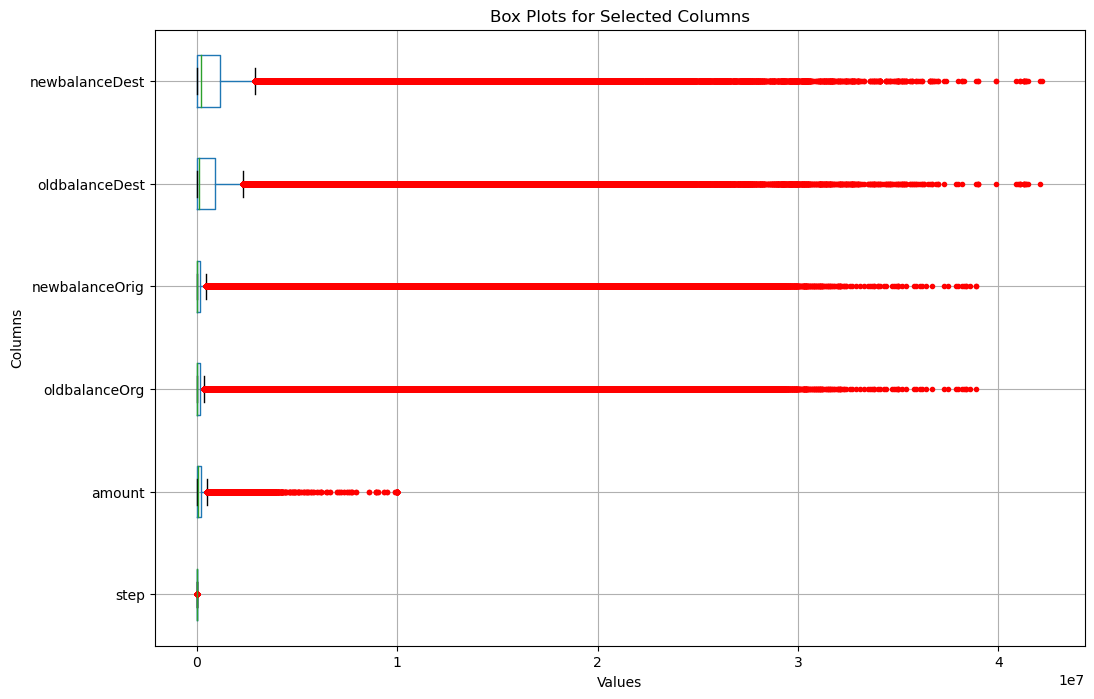

In [15]:
plot = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
# Create box plots using matplotlib
plt.figure(figsize=(12, 8))
df[plot].boxplot(sym='r.', vert=False)
plt.title('Box Plots for Selected Columns')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

###### We could see some outliers in the plots. 

#### Handling outliers
###### Now we'll remove the outlier:

In [16]:
def removeout(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur
lowlead_time,uplead_time=removeout(df["step"])
df["step"]=np.where(df["step"]>uplead_time,uplead_time,df["step"])
df["step"]=np.where(df["step"]<lowlead_time,lowlead_time,df["step"])

lowlead_time,uplead_time=removeout(df["amount"])
df["amount"]=np.where(df["amount"]>uplead_time,uplead_time,df["amount"])
df["amount"]=np.where(df["amount"]<lowlead_time,lowlead_time,df["amount"])

lowlead_time,uplead_time=removeout(df["oldbalanceOrg"])
df["oldbalanceOrg"]=np.where(df["oldbalanceOrg"]>uplead_time,uplead_time,df["oldbalanceOrg"])
df["oldbalanceOrg"]=np.where(df["oldbalanceOrg"]<lowlead_time,lowlead_time,df["oldbalanceOrg"])

lowlead_time,uplead_time=removeout(df["newbalanceOrig"])
df["newbalanceOrig"]=np.where(df["newbalanceOrig"]>uplead_time,uplead_time,df["newbalanceOrig"])
df["newbalanceOrig"]=np.where(df["newbalanceOrig"]<lowlead_time,lowlead_time,df["newbalanceOrig"])

lowlead_time,uplead_time=removeout(df["oldbalanceDest"])
df["oldbalanceDest"]=np.where(df["oldbalanceDest"]>uplead_time,uplead_time,df["oldbalanceDest"])
df["oldbalanceDest"]=np.where(df["oldbalanceDest"]<lowlead_time,lowlead_time,df["oldbalanceDest"])

lowlead_time,uplead_time=removeout(df["newbalanceDest"])
df["newbalanceDest"]=np.where(df["newbalanceDest"]>uplead_time,uplead_time,df["newbalanceDest"])
df["newbalanceDest"]=np.where(df["newbalanceDest"]<lowlead_time,lowlead_time,df["newbalanceDest"])

###### Now we'll take a look at it after removing outliers.

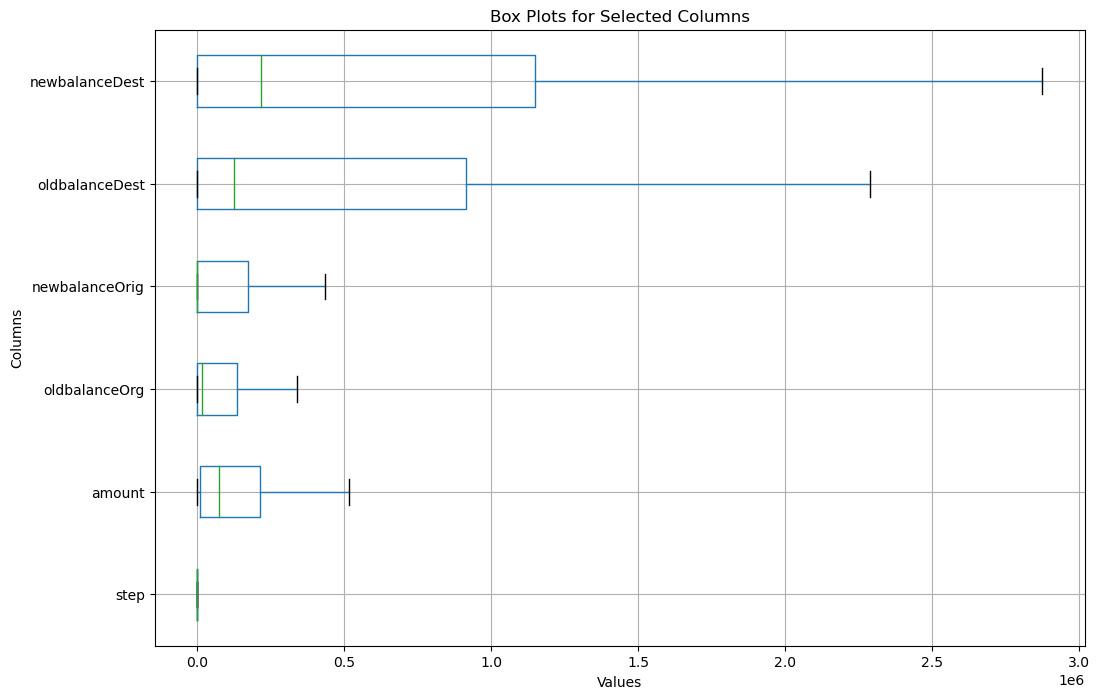

In [17]:
# Create box plots using matplotlib
plt.figure(figsize=(12, 8))
df[plot].boxplot(sym='r.', vert=False)
plt.title('Box Plots for Selected Columns')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

###### 1.Analysing the 'type' column.

In [18]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [19]:
payment = df.type.value_counts()
payment

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

As we have already seen there are 5 types of payment happened.

More money has been transacted mostly through cash out followed by payment type.

Let's plot it using horizontal bar

<Axes: >

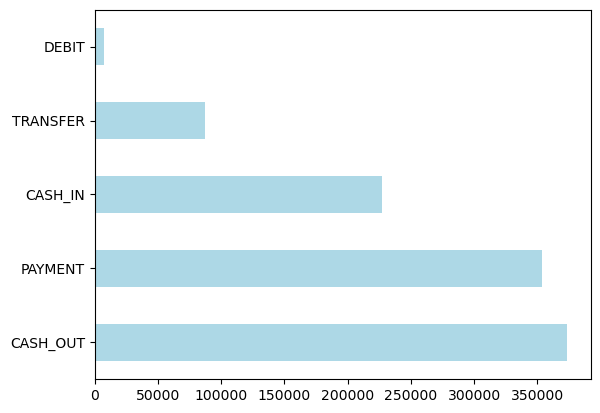

In [20]:
payment.plot(kind='barh',color="lightblue")

###### We could see the range of the types(Debit,Transfer,Cash-in,Payment and Cash-out)

<Axes: xlabel='type', ylabel='count'>

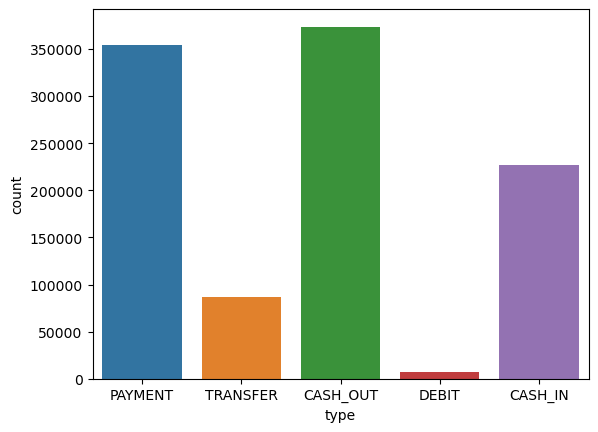

In [21]:
sns.countplot(x='type', data=df)

###### By this graph we could understand the cash-out has high amount of Transaction and followed by Payment , Cash-in and Transfer

#### relationship with type column with isfraud column

In [22]:
cross_tab_result=pd.crosstab(index=df.type,columns=df.isFraud)
cross_tab_result

isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


In [23]:
cross_tab_result[1]

type
CASH_IN       0
CASH_OUT    578
DEBIT         0
PAYMENT       0
TRANSFER    564
Name: 1, dtype: int64

###### We can see that fraud occurred mostly while during transfer andcashout

<Axes: xlabel='type'>

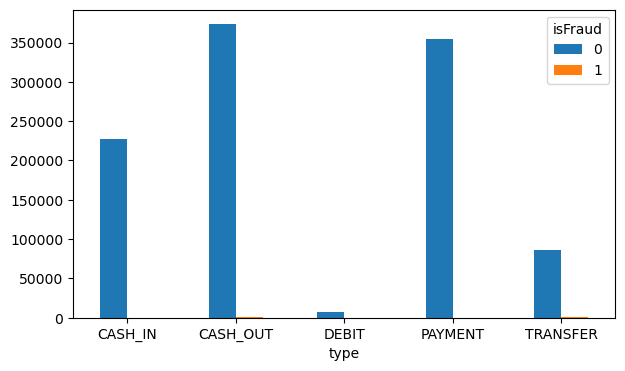

In [24]:
cross_tab_result.plot.bar(figsize=(7,4), rot=0)

#####  we could see there is an Fraud occurance in the Cash-out and Transfer type of transactions.

<Axes: xlabel='type'>

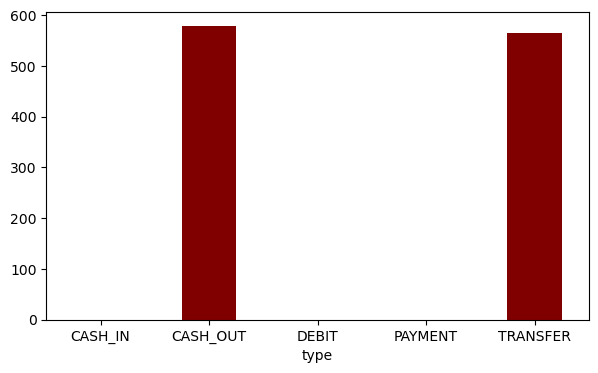

In [25]:
cross_tab_result[1].plot.bar(figsize=(7,4), rot=0,color="maroon")

##### By bar-graph we clearly see there is occurance of fraud only in the Cash-out and Transfer type and also count of the fraud occurance is:

In [26]:
cross_tab_result

isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


In [27]:
cashout= (2233384 + 4116)
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984

###### 0.184 % denotes the percentage of fraud happened in total cashout mode type, which is very less%

In [28]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

###### 0.769 % denotes the percentage of fraud happened in total tranfer mode type, which is very also less%

#### 3. Let's see amount column

In [29]:
df.amount

0            9839.64
1            1864.28
2             181.00
3             181.00
4           11668.14
             ...    
1048570    132557.35
1048571      9917.36
1048572     14140.05
1048573     10020.05
1048574     11450.03
Name: amount, Length: 1048575, dtype: float64

###### 4 .Let's check the minimum and maximum range amount.

In [30]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  0.1
Maximum:  516181.0225


###### 5.  Let's check the relationship of amount column with isFraud column

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

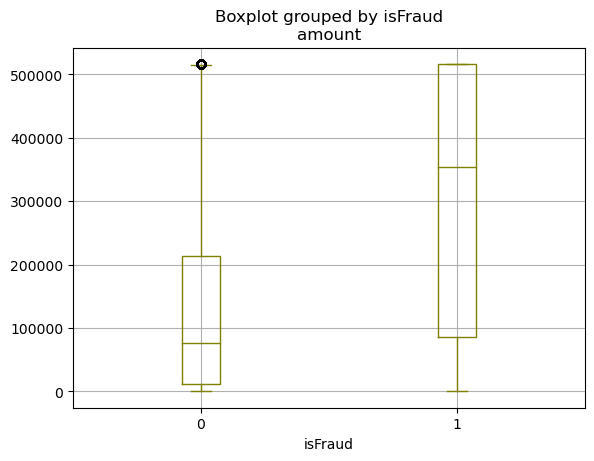

In [32]:
df.boxplot(column='amount', by='isFraud',color="olive")

##### Fraud amount transaction range is between 1.3-3.6 lakh

In [33]:
total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

1142

In [34]:
total_transactions = df.shape[0]

fraud_transaction = df[df.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.10890971079798775

In [35]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  1048575
Total fraud transactions happened:  1142
Total fraud transaction percent:  0.11


In [36]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1025194,48.0,CASH_OUT,516181.0225,C274359236,341605.05,0.0,C1653022223,2289742.05,2874338.675,1,0
1030596,75.0,CASH_OUT,516181.0225,C1566688012,341605.05,0.0,C1361631138,0.00,959018.790,1,0
875332,42.0,TRANSFER,516181.0225,C1883768704,341605.05,0.0,C1982874632,0.00,0.000,1,0
875333,42.0,CASH_OUT,516181.0225,C253446049,341605.05,0.0,C57938337,873589.17,2874338.675,1,0
899577,42.0,TRANSFER,516181.0225,C373557981,341605.05,0.0,C114416170,0.00,0.000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
301801,15.0,TRANSFER,170.0000,C553034695,170.00,0.0,C26381896,0.00,0.000,1,0
12180,7.0,CASH_OUT,164.0000,C1173659886,164.00,0.0,C1769947269,4068.00,0.000,1,0
12179,7.0,TRANSFER,164.0000,C1455969984,164.00,0.0,C2119910556,0.00,0.000,1,0
277266,15.0,CASH_OUT,119.0000,C1584512618,119.00,0.0,C2102058838,2289742.05,2874338.675,1,0


<Axes: ylabel='Frequency'>

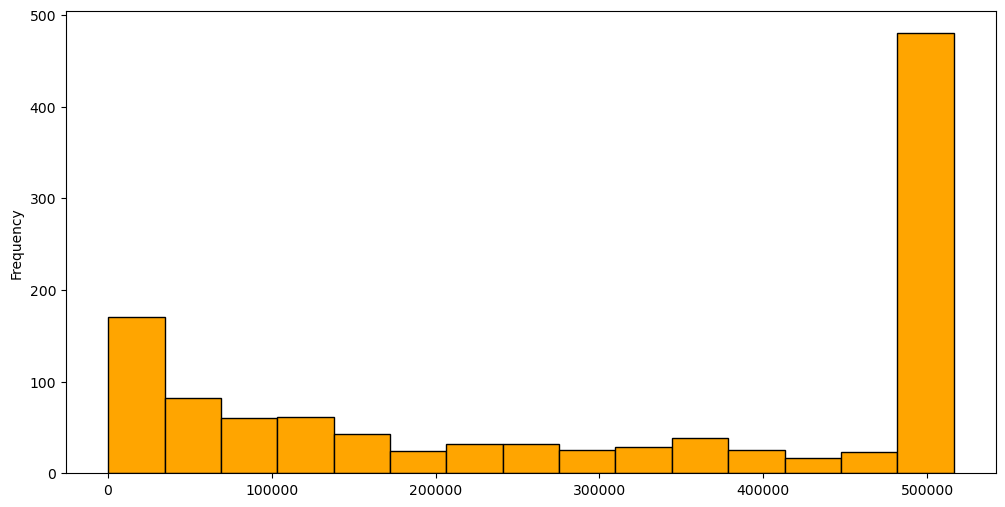

In [37]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

###### We've found that fraud amount transaction ranges between 1.3-3.6 lakh
###### Now, we can see that among them most occured were around 340,000-360,000 (3.4-3.6 lakh)

##### 7. Let's see at step column

<Axes: xlabel='step', ylabel='Density'>

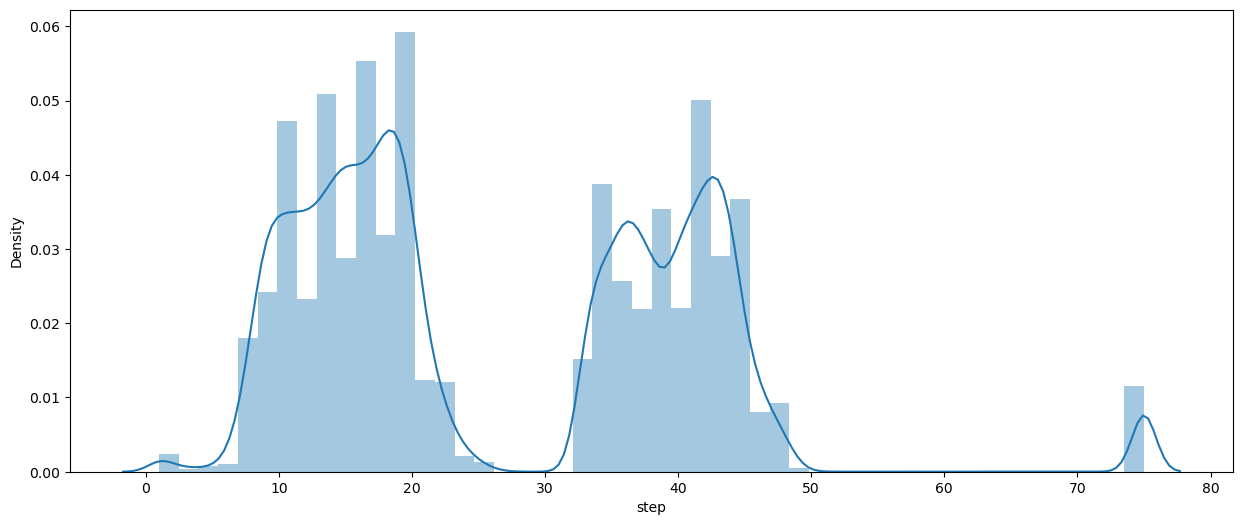

In [38]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

##### Distribution of the Step (hour) column

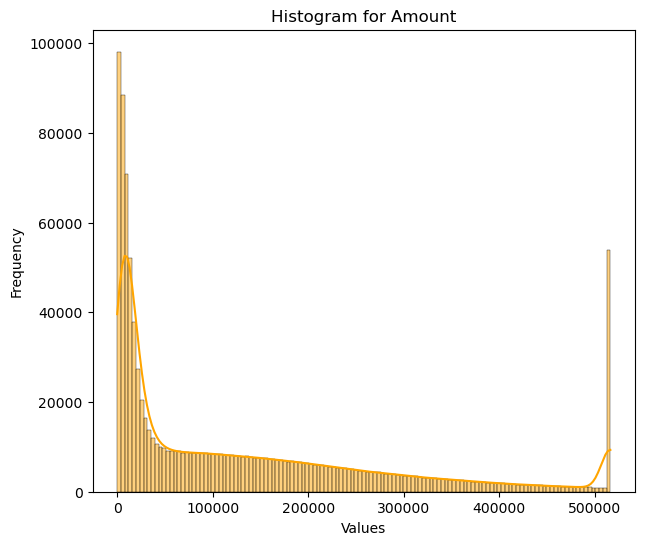

In [39]:
# Histogram
plt.figure(figsize=(7, 6))
sns.histplot(df["amount"], kde=True,color="orange")
plt.title('Histogram for Amount')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

###### Histogram is used to shows the distribution of the amount.

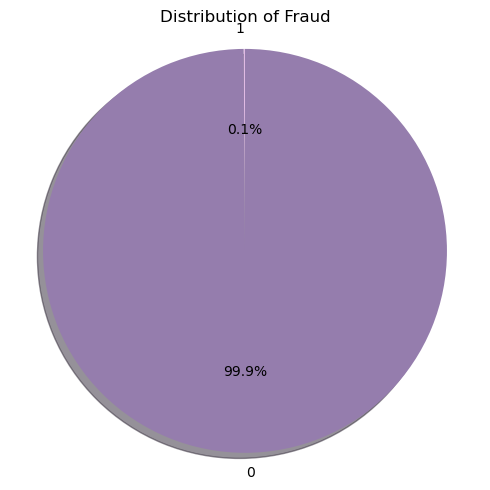

In [40]:
# pie chart
labels = df['isFraud'].unique()
sizes = (df['isFraud'].value_counts()/df['isFraud'].value_counts().sum())*100
sizes = sizes.sort_index(ascending=False)
labels = sizes.index
plt.figure(figsize=(5,5))
colors = ['#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.axis('equal')
plt.title("Distribution of Fraud")
plt.tight_layout()
plt.show()

The resulting pie chart provides an overview of the class distribution in the credit card fraud dataset. Each slice represents a class ('Fraud' or 'Non-Fraud'), and its size corresponds to the proportion of that class in the dataset. The percentage values displayed within each slice indicate the relative occurrence of each class.It takes value 1 in case of fraud and 0 not fraud.

which means fraud is 0.1%  and not fraud is 99.9% .

### Bivariate Analysis

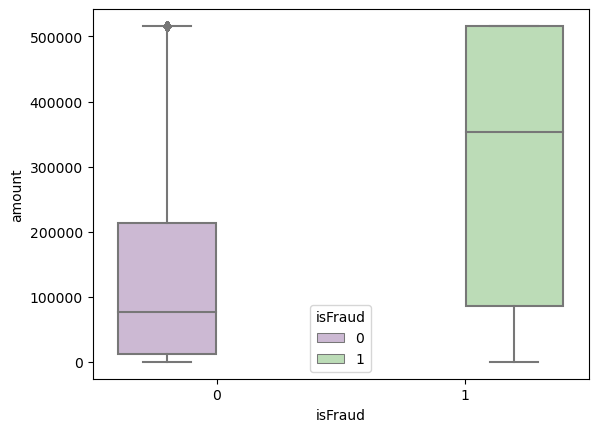

In [41]:
s = sns.boxplot( x="isFraud", y="amount", hue="isFraud",data=df, palette="PRGn",showfliers=True)
plt.show()

###### The boxplot allows us to observe the central tendency, variability, and presence of outliers for each class. The left box corresponds to non-fraudulent transactions (isFraud=0), and the right box corresponds to fraudulent transactions (isFraud=1). The whiskers of the boxplots represent the range of typical values for each class, while any individual points beyond the whiskers represent potential outliers in the data. The plot provides a visual comparison of the transaction amounts for both classes and can help identify any significant differences or patterns in the amounts between the two groups.






### Multivariate

<Axes: >

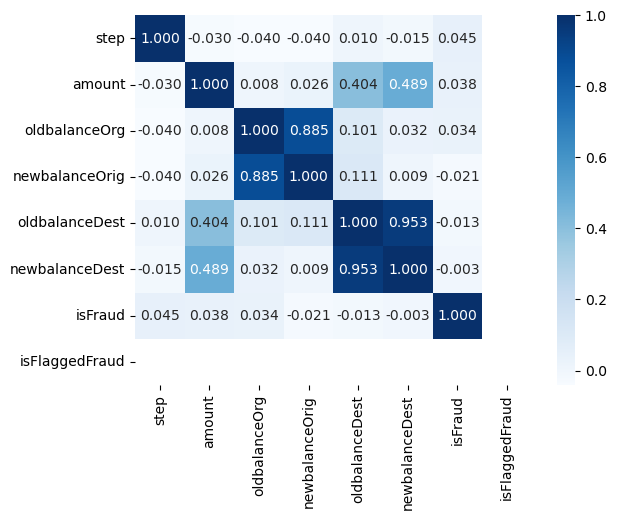

In [42]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

###### There is a high correlation between newbalanceOrig and oldbalanceOrg.

Also, between newbalanceDest and oldbalanceDest.

Apart from that, we have a relatively high correlation between amount and newbalanceDest and amount with oldbalanceDest

#### Data Preprocessing
Since the given dataset is highly imbalanced we need to balance the dataset before training our model.

In [43]:
df.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

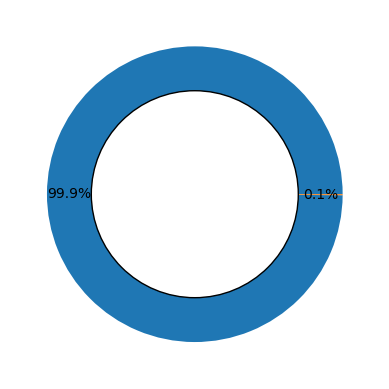

In [44]:
plt.pie(df.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white',color="black")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

###### The slices of the donut chart represent the percentage of fraudulent and non-fraudulent transactions, and the inner white circle enhances the chart's visual appeal. The percentage values are also displayed on the chart to provide additional information about the distribution of fraud and non-fraud cases.
which means fraud is 0.1% and not fraud is 99.9% .

In [45]:
# class count
class_count_0, class_count_1 = df['isFraud'].value_counts()
# Separate class
class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1047433, 11)
class 1: (1142, 11)


#### Under Sampling technique

total class of 1 and0: 0    1142
1    1142
Name: isFraud, dtype: int64


<Axes: title={'center': 'Target-variable (isFraud)'}>

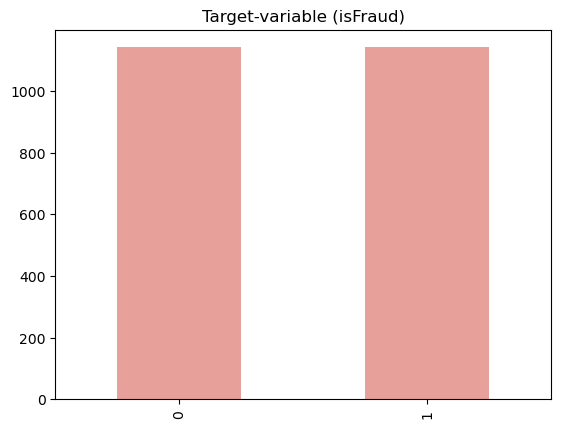

In [46]:
class_0_under = class_0.sample(class_count_1)
df = pd.concat([class_0_under, class_1], axis=0)
print("total class of 1 and0:",df['isFraud'].value_counts())
df['isFraud'].value_counts().plot(kind='bar', title='Target-variable (isFraud)',color="#E8A09A")

##### We Balancing the Dataset,
The under-sampling technique to balance the class distribution of a binary target variable in a dataset. This technique helps address the problem of imbalanced classification, where one class is significantly underrepresented. After under-sampling, the resulting dataset has an equal number of samples for both classes, and this balanced dataset can be used to train a machine learning model for improved performance in predicting both classes.

In [47]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
855974,41.0,CASH_IN,130038.2900,C233811147,310921.00,436499.975,C145219077,53013.47,127732.49,0,0
695279,36.0,TRANSFER,516181.0225,C2093741059,24488.00,0.000,C1556582837,0.00,753224.57,0,0
16215,8.0,PAYMENT,11500.8800,C576448068,72434.18,60933.300,M829035073,0.00,0.00,0,0
1033902,75.0,PAYMENT,5592.3000,C255068655,39910.00,34317.700,M1986772887,0.00,0.00,0,0
240632,14.0,PAYMENT,743.4500,C132541778,0.00,0.000,M599101032,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1047888,75.0,CASH_OUT,56745.1400,C526144262,56745.14,0.000,C79051264,51433.88,108179.02,1,0
1048221,75.0,TRANSFER,33676.5900,C732111322,33676.59,0.000,C1140210295,0.00,0.00,1,0
1048222,75.0,CASH_OUT,33676.5900,C1000086512,33676.59,0.000,C1759363094,0.00,33676.59,1,0
1048323,75.0,TRANSFER,87999.2500,C927181710,87999.25,0.000,C757947873,0.00,0.00,1,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 855974 to 1048324
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2284 non-null   float64
 1   type            2284 non-null   object 
 2   amount          2284 non-null   float64
 3   nameOrig        2284 non-null   object 
 4   oldbalanceOrg   2284 non-null   float64
 5   newbalanceOrig  2284 non-null   float64
 6   nameDest        2284 non-null   object 
 7   oldbalanceDest  2284 non-null   float64
 8   newbalanceDest  2284 non-null   float64
 9   isFraud         2284 non-null   int64  
 10  isFlaggedFraud  2284 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 214.1+ KB


In [49]:
df.type.unique()

array(['CASH_IN', 'TRANSFER', 'PAYMENT', 'CASH_OUT', 'DEBIT'],
      dtype=object)

In [50]:
df["type"].value_counts()

CASH_OUT    981
TRANSFER    655
PAYMENT     384
CASH_IN     258
DEBIT         6
Name: type, dtype: int64

In [51]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [52]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [53]:
df=df.drop(columns=["oldbalanceDest","newbalanceDest"],axis=True)

we removing the oldbalanceDest and newbalanceDest columns is not much significant to the dataset and also by removing it does not affect dependent varaiable

In [54]:
df.dtypes

step              float64
type                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [55]:
df.shape

(2284, 9)

In [56]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
1047888,75.0,1,56745.14,C526144262,56745.14,0.0,C79051264,1,0
1048221,75.0,4,33676.59,C732111322,33676.59,0.0,C1140210295,1,0
1048222,75.0,1,33676.59,C1000086512,33676.59,0.0,C1759363094,1,0
1048323,75.0,4,87999.25,C927181710,87999.25,0.0,C757947873,1,0
1048324,75.0,1,87999.25,C409531429,87999.25,0.0,C1827219533,1,0


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])

In [58]:
df.shape

(2284, 9)

In [59]:
df.dtypes

step              float64
type                int64
amount            float64
nameOrig            int32
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int32
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [60]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
855974,41.0,3,130038.2900,1349,310921.00,436499.975,420,0,0
695279,36.0,4,516181.0225,1273,24488.00,0.000,520,0,0
16215,8.0,2,11500.8800,1784,72434.18,60933.300,2228,0,0
1033902,75.0,2,5592.3000,1374,39910.00,34317.700,2070,0,0
240632,14.0,2,743.4500,354,0.00,0.000,2175,0,0
...,...,...,...,...,...,...,...,...,...
1047888,75.0,1,56745.1400,1738,56745.14,0.000,1661,1,0
1048221,75.0,4,33676.5900,1974,33676.59,0.000,151,1,0
1048222,75.0,1,33676.5900,0,33676.59,0.000,724,1,0
1048323,75.0,4,87999.2500,2198,87999.25,0.000,1629,1,0


#### Splitting the data into trained data and test data

In [61]:
x = df.drop(columns=["isFraud"],axis=True)
y=df["isFraud"]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Initialize the StandardScaler

In [63]:
scaler = StandardScaler()
# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(x_train)

## Model Building

## <a id="61">AdaBoost</a>

In [64]:
model_1 = AdaBoostClassifier()
model_1.fit(X_train_scaled,y_train)

AdaBoostClassifier()

In [65]:
model_1.score(X_train_scaled,y_train)

0.9627805145046524

In [66]:
model_1.score(x_test,y_test)

0.5032822757111597

Confusion Matrix:
[[230   0]
 [227   0]]


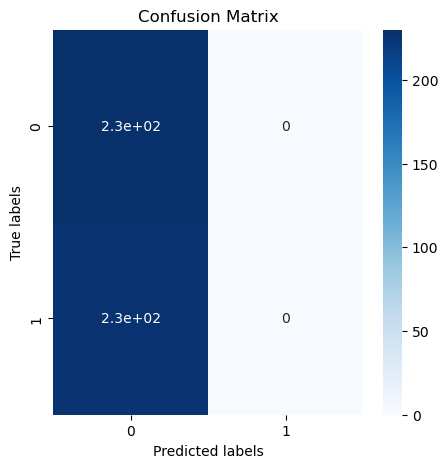

In [67]:
y_pred = model_1.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">Support Vector Classifier</a>

In [68]:
model_2=SVC()
model_2.fit(X_train_scaled,y_train)

SVC()

In [69]:
model_2.score(X_train_scaled,y_train)

0.9490968801313628

In [70]:
model_2.score(x_test,y_test)

0.49671772428884026

Confusion Matrix:
[[  0 230]
 [  0 227]]


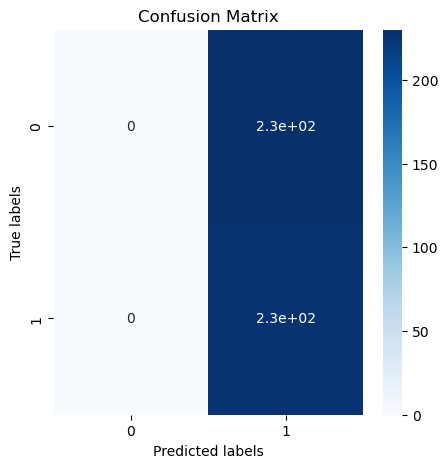

In [71]:
y_pred = model_2.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">LogisticRegression</a>

In [72]:
model_3 = LogisticRegression()
model_3.fit(X_train_scaled,y_train)

LogisticRegression()

In [73]:
model_3.score(X_train_scaled,y_train)

0.9074986316365626

In [74]:
model_3.score(x_test,y_test)

0.8840262582056893

Confusion Matrix:
[[180  50]
 [  3 224]]


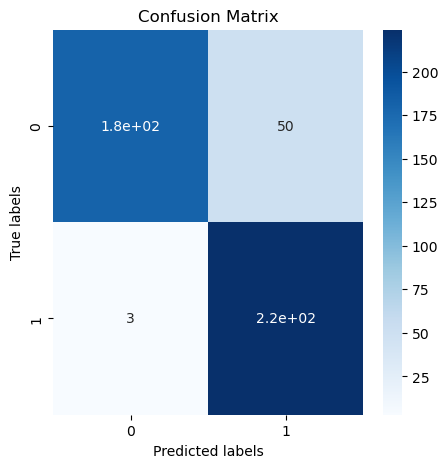

In [75]:
y_pred = model_3.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">KNeighborsClassifier</a>

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
neighbors=list(range(1,10,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [77]:
MSE=[1-x for x in cv_scores]
MSE

[0.036750172374167,
 0.02579866697310962,
 0.02667777522408643,
 0.029307438902934302,
 0.03149659082203338]

In [78]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

3

Text(0, 0.5, 'Error')

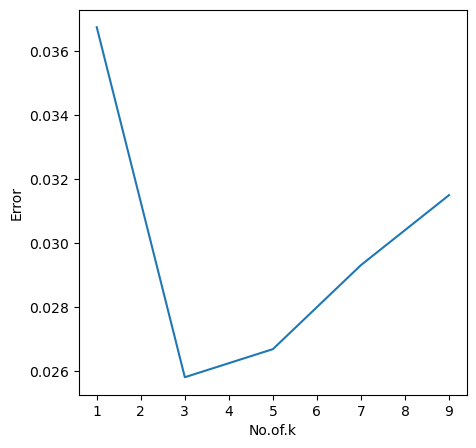

In [79]:
plt.figure(figsize=(5, 5))
plt.plot(neighbors,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')

In [80]:
model_4=KNeighborsClassifier(n_neighbors=3)
model_4.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [81]:
model_4.score(X_train_scaled,y_train)

0.9594964422550629

In [82]:
model_4.score(x_test,y_test)

0.5120350109409191

Confusion Matrix:
[[  7 223]
 [  0 227]]


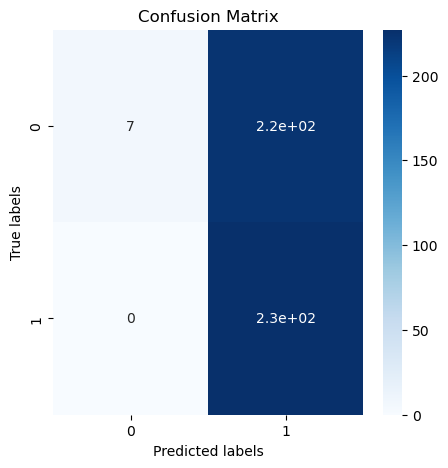

In [83]:
y_pred = model_4.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">RandomForestClassifier</a>

In [84]:
model_5 = RandomForestClassifier()
model_5.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [85]:
model_5.score(X_train_scaled,y_train)

1.0

In [86]:
model_5.score(x_test,y_test)

0.6652078774617067

Confusion Matrix:
[[ 80 150]
 [  3 224]]


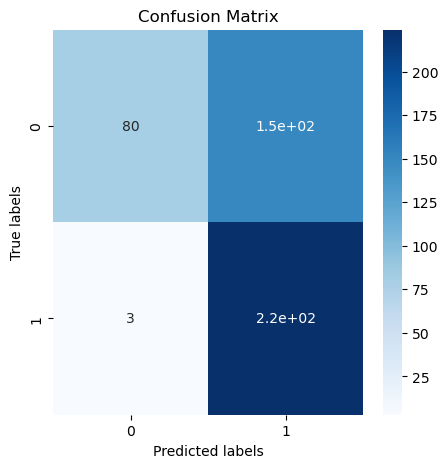

In [87]:
y_pred = model_5.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">DecisionTreeClassifier</a>

In [88]:
model_6=DecisionTreeClassifier()
model_6.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [89]:
model_6.score(X_train_scaled,y_train)

1.0

In [90]:
model_6.score(x_test,y_test)

0.49671772428884026

Confusion Matrix:
[[  0 230]
 [  0 227]]


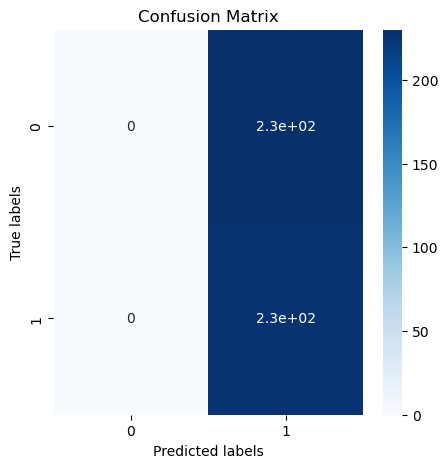

In [91]:
y_pred = model_6.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">XGBoost</a>

In [92]:
model_7 = XGBClassifier()
model_7.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [93]:
model_7.score(X_train_scaled,y_train)

1.0

In [94]:
model_7.score(x_test,y_test)

0.5032822757111597

Confusion Matrix:
[[230   0]
 [227   0]]


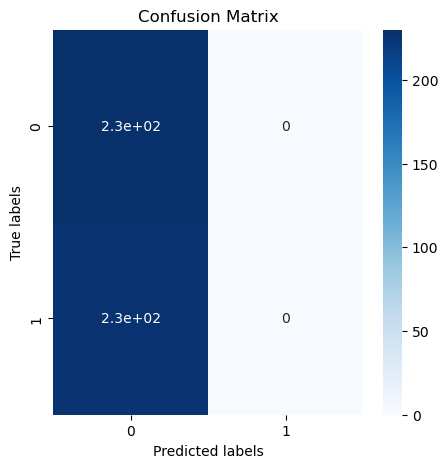

In [95]:
y_pred = model_7.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [96]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Ada Boost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),

}

In [103]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train_scaled))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print('-'*30)

Training Model Logistic Regression 
--------------
Training Accuracy: 0.9074986316365626
Testing Accuracy: 0.8840262582056893
Testing Confusion Matrix: 
[[180  50]
 [  3 224]]
Recall Score :  0.8840262582056893
Precision Score :  0.8840262582056893
Testing F-1: 0.8840262582056893
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9436234263820471
Testing Accuracy: 0.5076586433260394
Testing Confusion Matrix: 
[[  5 225]
 [  0 227]]
Recall Score :  0.5076586433260394
Precision Score :  0.5076586433260394
Testing F-1: 0.5076586433260394
------------------------------
Training Model Decision Tree 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.49671772428884026
Testing Confusion Matrix: 
[[  0 230]
 [  0 227]]
Recall Score :  0.49671772428884026
Precision Score :  0.49671772428884026
Testing F-1: 0.49671772428884026
------------------------------
Training Model Random Forest 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.665207877

###### As we see the Logistic Regression   is the best algorithm with :

Training accuracy : 90%    
Testing accuracy : 88%        
.......  As comparing to all algorithm  ......

### Prediction for new data

In [98]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
855974,41.0,3,130038.2900,1349,310921.00,436499.975,420,0,0
695279,36.0,4,516181.0225,1273,24488.00,0.000,520,0,0
16215,8.0,2,11500.8800,1784,72434.18,60933.300,2228,0,0
1033902,75.0,2,5592.3000,1374,39910.00,34317.700,2070,0,0
240632,14.0,2,743.4500,354,0.00,0.000,2175,0,0
...,...,...,...,...,...,...,...,...,...
1047888,75.0,1,56745.1400,1738,56745.14,0.000,1661,1,0
1048221,75.0,4,33676.5900,1974,33676.59,0.000,151,1,0
1048222,75.0,1,33676.5900,0,33676.59,0.000,724,1,0
1048323,75.0,4,87999.2500,2198,87999.25,0.000,1629,1,0


In [99]:
# Example data point for a potential Not fraudulent transaction
prediction = np.array([[9,2,4220.57,691,143731.00,142369.28,2033,0]])

# Preprocess and scale the data point using the same scaler
predict_scaled = scaler.transform(prediction)

# Make the prediction
predicting_values = model.predict(predict_scaled)[0]

# Check if it is fraud or not
if predicting_values == 1:
    print("Fraudulent Transaction")
else:
    print("Not Fraudulent Transaction")

Not Fraudulent Transaction


In [100]:
# Example data point for a potential fraudulent transaction
prediction = np.array([[95,1,56745.14,1708,56745.14,0.00,1649,0]])

# Preprocess and scale the data point using the same scaler
predict_scaled = scaler.transform(prediction)

# Make the prediction
predicting_values = model.predict(predict_scaled)[0]

# Check if it is fraud or not
if predicting_values == 1:
    print("Fraudulent Transaction")
else:
    print("Not Fraudulent Transaction")

Fraudulent Transaction


In [101]:
from joblib import dump

In [102]:
dump(model_3, './../savedModels/Online payment fraud detection(capstone)-Copy1.joblib')

['./../savedModels/Online payment fraud detection(capstone)-Copy1.joblib']

### In this Dataset isFraud is an dependent varaiable we can see isfraud contains 0's and 1's.
###### which means 0 is Known as Not Fraudulent Transaction and 1 is known as Fraudulent Transaction

## CONCLUSION:

1. Dataset Overview: The dataset contains 6,362,620 rows and 11 columns. Each row represents a transaction, and the columns represent various attributes of the transactions, such as time, transaction type, transaction amount, customer information, and recipient information. The target variable is `isFraud`, which indicates whether a transaction is fraudulent (1) or not (0).

2. Features: The dataset includes features such as `step`, `type`, `amount`, `nameOrig`, `oldbalanceOrg`, `newbalanceOrig`, `nameDest`, `oldbalanceDest`, `newbalanceDest`, `isFraud`, and `isFlaggedFraud`.

3. Target Variable: The primary task is to predict whether a transaction is fraudulent (`isFraud` = 1) or not (`isFraud` = 0). This is a binary classification problem.

4. Fraud Detection: The goal is to develop a machine learning model that can effectively detect fraudulent transactions to prevent financial losses and protect customers and businesses.

5. Best Algorithm: According to the inference made from the provided code, the Random Forest classifier achieved the highest AUC score among all the classifiers evaluated. A higher AUC score indicates better performance in distinguishing between fraudulent and non-fraudulent transactions. Therefore, it can be concluded that the Random Forest algorithm is the best-performing model for this specific dataset and task of online payment fraud detection.

###### However, it's important to note that the choice of the "best" algorithm may depend on various factors, including data size, data quality, feature engineering, and specific performance metrics. Therefore, it's always recommended to perform thorough model evaluation and hyperparameter tuning to ensure the most suitable algorithm for a given problem. Additionally, you may want to explore other machine learning algorithms and techniques to further improve the model's performance.